In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    roc_auc_score,
    auc
)

## Task 5: Binary Classification with Logistic Regression 

- Load the Breast Cancer Dataset from sklearn.datasets. 
- Train a logistic regression model to predict whether a tumor is 
benign or malignant. 
- Evaluate using: 
    1. Accuracy 
    2. Confusion Matrix 
    3. Precision, Recall, F1-score 
    4. ROC-AUC curve 

In [2]:
data=load_breast_cancer()
# data

In [3]:

data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [4]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [5]:
df=pd.DataFrame(data.data,columns=data.feature_names)
# Add target column (binary: 0 = malignant, 1 = benign)
df['target'] = data.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [6]:
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [7]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [8]:
input_colms=data.feature_names
output_colms='target'

X_data=df[input_colms]
Y_data=df[output_colms]

In [9]:
X_data=X_data.values
Y_data=Y_data.values

In [10]:
print(X_data.shape,Y_data.shape)

(569, 30) (569,)


In [11]:
x_train,x_test,y_train,y_test=train_test_split(X_data,Y_data,test_size=0.8,random_state=42)

In [12]:
model=LogisticRegression(max_iter=100000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=100000)

In [13]:
#Accuracy

y_pred=model.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print("Accuracy:",acc)

Accuracy: 0.9692982456140351


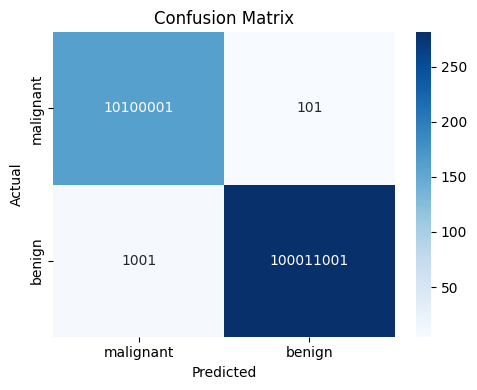

In [14]:
# Confusion Matrix 

matrix=confusion_matrix(y_test,y_pred)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='b', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

plt.tight_layout()
plt.show()



In [15]:
# Classification Report

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))

Classification Report:
              precision    recall  f1-score   support

   malignant       0.95      0.97      0.96       166
      benign       0.98      0.97      0.98       290

    accuracy                           0.97       456
   macro avg       0.96      0.97      0.97       456
weighted avg       0.97      0.97      0.97       456



ROC-AUC Score: 0.9902160365600332


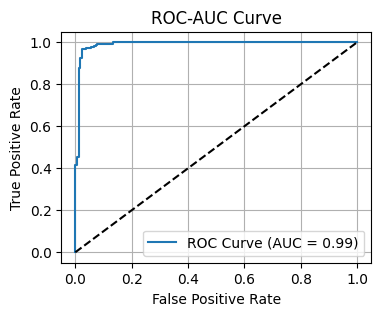

In [16]:
# Probabilities for ROC

plt.figure(figsize=(4,3))

y_probs = model.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)
print("ROC-AUC Score:", auc_score)

plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")

plt.legend()
plt.grid()
plt.show()

## Task 6: Threshold Tuning and Probability Interpretation 

- Predict the probability of the positive class. 
- Change the threshold (e.g., 0.3, 0.5, 0.7) and observe how the 
confusion matrix and F1-score change. 
- Plot the ROC curve and mark optimal threshold. 

In [17]:
from sklearn.metrics import f1_score


In [18]:
data = load_breast_cancer()
X = data.data
y = data.target

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=10000)

In [21]:
y_probs = model.predict_proba(X_test)[:, 1]  

In [22]:
def new_threshold(threshold):
    y_probs_new=(y_probs>=threshold).astype(int)
    matrix=confusion_matrix(y_test,y_probs_new)
    f1=f1_score(y_test,y_probs_new)
    print(f"\nThreshold: {threshold}")
    print("Confusion Matrix:\n", matrix)
    print("F1 Score:", f1)
    print("Classification Report:\n", classification_report(y_test, y_probs_new))

for t in [0.3, 0.5, 0.7]:
    new_threshold(t)



Threshold: 0.3
Confusion Matrix:
 [[39  4]
 [ 1 70]]
F1 Score: 0.9655172413793104
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Threshold: 0.5
Confusion Matrix:
 [[39  4]
 [ 1 70]]
F1 Score: 0.9655172413793104
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Threshold: 0.7
Confusion Matrix:
 [[41  2]
 [ 1 70]]
F1 Score: 0.9790209790209791
Classification Report:
               precision  

[           inf 9.99999402e-01 8.50116068e-01 7.26385381e-01
 7.18599830e-01 1.74865173e-01 8.22478892e-02 8.40752449e-25]
[0.         0.         0.         0.04651163 0.04651163 0.11627907
 0.11627907 1.        ]
[0.         0.01408451 0.97183099 0.97183099 0.98591549 0.98591549
 1.         1.        ]


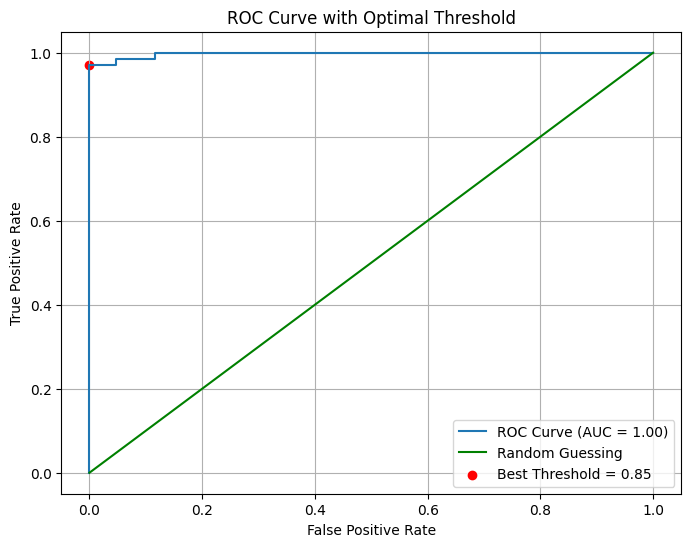

In [23]:
# ROC curve

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)
print(thresholds)
print(fpr)
print(tpr)

# Compute F1 scores
f1_scores = []
for thresh in thresholds:
    y_pred = (y_probs >= thresh).astype(int)
    f1_scores.append(f1_score(y_test, y_pred))


# best threshold
optimal_idx = np.argmax(f1_scores)
optimal_thresh = thresholds[optimal_idx]
optimal_f1 = f1_scores[optimal_idx]

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], label="Random Guessing",color = 'g')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', label=f"Best Threshold = {optimal_thresh:.2f}")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve with Optimal Threshold")

plt.legend()
plt.grid()
plt.show()

## Task 7: Multiclass Classification (Optional)

- Use the Iris Dataset to perform multiclass logistic regression. 
- Use one-vs-rest or multinomial strategy. 
- Evaluate model accuracy and classification report. 

In [24]:
from sklearn.datasets import load_iris

In [25]:
iris = load_iris()
X = iris.data
y = iris.target

print("Target classes:", iris.target_names)

Target classes: ['setosa' 'versicolor' 'virginica']


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
model.fit(X_train, y_train)


C:\Users\LENOVO\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=200, multi_class='multinomial')

In [28]:
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
